### 다중분류를 위한 OVR(OVA)

- 분류 클리스 수 만큼 2진 분류기를 생성하여 다중 분류를 진행

In [1]:
# 모듈로딩
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

# 판다스에서 지수표기법(과학적 표기법) 정지 설정
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=6, suppress=True)

- 데이터셋 load_digits
    * 내장 데이터셋
    * 이미지 데이터셋 => 8 * 8 크기 이미지
    * 이미지 라벨/타겟 => 숫자 0 ~ 9까지 즉, 총 10개 클래스

In [2]:
featureDF, targetSR = load_digits(as_frame=True, return_X_y=True)

# 이미지 픽셀 : 0 ~ 255 범위 (스케일링 안해줘도 되지만 연산을 쉽게 하기 위해)
featureDF = featureDF / 255

print(featureDF.shape, featureDF.ndim, targetSR.shape, targetSR.ndim)

(1797, 64) 2 (1797,) 1


In [3]:
# featureDF, targetSR = load_iris(as_frame=True, return_X_y=True)
# print(featureDF.shape, featureDF.ndim, targetSR.shape, targetSR.ndim)

In [4]:
imgData = featureDF.iloc[1796].to_numpy().reshape(8,-1)
imgData.shape

(8, 8)

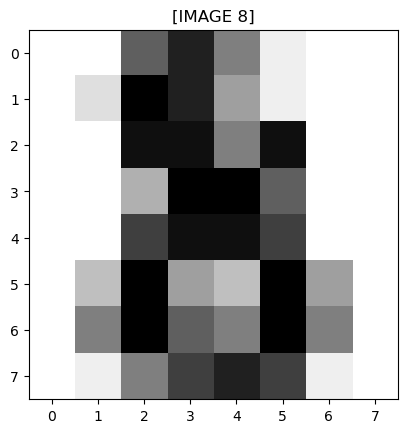

In [5]:
# 시각화
import matplotlib.pyplot as plt

plt.imshow(imgData, cmap='binary')
plt.title(f"[IMAGE {targetSR[1796]}]")
plt.show()

- 학습용 데이터셋 준비 : trainDS, testDS

In [6]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR,
                                                    stratify=targetSR,
                                                    random_state=10)

- OvR(Over vs Rest) 또는 OvA(Over vs All)
    - 클래스마다 이진 분류기 만들어서 가장 높은 결정점수 낸 클래스 선택

In [7]:
# 모듈로딩
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

ovr_clf = OneVsRestClassifier(LogisticRegression(max_iter = 1000))
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [8]:
# 모델 파라미터
print(f"ovr_clf.estimators_ : {len(ovr_clf.estimators_)}개")
print(f"ovr_clf.classes_ : {ovr_clf.classes_}")
print(f"ovr_clf.n_classes_ : {ovr_clf.n_classes_}")
print(f"ovr_clf.label_binarizer_ : {ovr_clf.label_binarizer_}")

ovr_clf.estimators_ : 10개
ovr_clf.classes_ : [0 1 2 3 4 5 6 7 8 9]
ovr_clf.n_classes_ : 10
ovr_clf.label_binarizer_ : LabelBinarizer(sparse_output=True)


In [9]:
model = LogisticRegression(multi_class='ovr', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [10]:
for idx in range(ovr_clf.n_classes_):
    print(f"[{idx} 분류기]", ovr_clf.estimators_[idx].coef_, ovr_clf.estimators_[idx].intercept_)

[0 분류기] [[ 0.       -0.117211 -0.361977  0.637993 -0.259516 -1.280042 -0.549555
  -0.051539 -0.002489 -0.450771  0.87553   0.67567   0.761063  1.421815
  -0.372707 -0.047908 -0.000876  0.483967  1.735262 -0.566662 -1.827955
   2.027963  0.680701 -0.023    -0.000234  1.171667  1.431241 -2.773392
  -4.069452  0.621786  1.751173 -0.001039  0.        1.440423  1.660744
  -3.354668 -4.168379 -0.182033  1.700054  0.       -0.006227  0.753401
   2.703978 -2.235013 -2.415652  1.074093  0.919099 -0.012728 -0.001924
   0.023211  2.278424  0.391211  0.569341  1.801441 -0.651051 -0.079346
  -0.000345 -0.112692 -0.545168  0.615148  0.574332 -0.674338 -0.772614
  -0.134407]] [-2.294685]
[1 분류기] [[ 0.       -0.143074 -1.132225 -1.180677 -0.866008  0.169236 -0.195313
  -0.061496 -0.003632 -0.881948 -2.792764  0.176256  1.541474  0.322755
  -0.319918 -0.054061 -0.001149 -0.63731  -1.214654  3.468259  3.133466
  -0.135821 -0.452731 -0.026653 -0.000552 -0.068647  0.070149  2.400616
   1.588896 -0.631002 

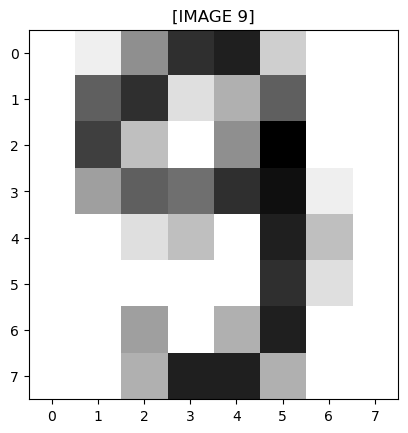

In [66]:
imgData2 = (X_test.loc[1249, :] * 255).to_numpy().reshape(8,-1)
imgData2.shape

# 시각화
import matplotlib.pyplot as plt

plt.imshow(imgData2, cmap='binary')
plt.title(f"[IMAGE {y_test[1249]}]")
plt.show()

In [70]:
ovr_clf.predict_proba(X_test.loc[[1249], :])

array([[0.118287, 0.06343 , 0.079839, 0.154541, 0.065147, 0.109963,
        0.053017, 0.081382, 0.092324, 0.182071]])

In [65]:
ovr_clf.predict_proba(X_test.loc[[1249], :]).max(), ovr_clf.predict_proba(X_test.loc[[1249], :]).argmax()

(0.18207056534993868, 9)

In [11]:
ovr_clf.predict_proba(X_test.iloc[:2])

array([[0.078773, 0.07785 , 0.117592, 0.192254, 0.046543, 0.106452,
        0.083023, 0.069872, 0.090864, 0.136776],
       [0.118287, 0.06343 , 0.079839, 0.154541, 0.065147, 0.109963,
        0.053017, 0.081382, 0.092324, 0.182071]])

In [12]:
# LogisticRegression에서 제공하는 속성
print(f"model.classes_ : {model.classes_}")  # 클래스 목록
print(f"model.coef_ : {model.coef_}")        # 각 클래스에 대한 회귀 계수
print(f"model.intercept_ : {model.intercept_}")  # 각 클래스에 대한 절편

model.classes_ : [0 1 2 3 4 5 6 7 8 9]
model.coef_ : [[ 0.       -0.117211 -0.361977  0.637993 -0.259516 -1.280042 -0.549555
  -0.051539 -0.002489 -0.450771  0.87553   0.67567   0.761063  1.421815
  -0.372707 -0.047908 -0.000876  0.483967  1.735262 -0.566662 -1.827955
   2.027963  0.680701 -0.023    -0.000234  1.171667  1.431241 -2.773392
  -4.069452  0.621786  1.751173 -0.001039  0.        1.440423  1.660744
  -3.354668 -4.168379 -0.182033  1.700054  0.       -0.006227  0.753401
   2.703978 -2.235013 -2.415652  1.074093  0.919099 -0.012728 -0.001924
   0.023211  2.278424  0.391211  0.569341  1.801441 -0.651051 -0.079346
  -0.000345 -0.112692 -0.545168  0.615148  0.574332 -0.674338 -0.772614
  -0.134407]
 [ 0.       -0.143074 -1.132225 -1.180677 -0.866008  0.169236 -0.195313
  -0.061496 -0.003632 -0.881948 -2.792764  0.176256  1.541474  0.322755
  -0.319918 -0.054061 -0.001149 -0.63731  -1.214654  3.468259  3.133466
  -0.135821 -0.452731 -0.026653 -0.000552 -0.068647  0.070149  2.40061